In [9]:
import pandas as pd
import numpy as np

In [ ]:
user_data = pd.read_csv("./classifiers/features-bloc.csv")

In [11]:
user_data.head()

,user_id,class,E E,E H,E U,E m,E q,E t,E ¤,E φ,...,⚄ T,⚄ p,⚄ r,⚄ π,⚄ ρ,⚅ T,⚅ p,⚅ r,⚅ π,⚅ ρ
0,1.106326e+18,bot,0.001160,0.005290,0.000000,0.011019,0.004313,0.011580,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.162760e+18,bot,0.001937,0.001767,0.002402,0.016355,0.007202,0.021094,0.0,0.009054,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.120465e+17,bot,0.011263,0.004403,0.003990,0.003397,0.011967,0.026287,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.186273e+17,bot,0.002445,0.000000,0.000000,0.003871,0.004546,0.016642,0.0,0.000000,...,0.002705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.112680e+09,bot,0.017795,0.016232,0.011033,0.070441,0.000000,0.072681,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = user_data['class'].values
y

array(['bot', 'bot', 'bot', ..., 'human', 'human', 'human'], dtype=object)

In [13]:
X = user_data.drop(['user_id', 'class'], axis=1).values
X

array([[0.00115983, 0.00528996, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00193674, 0.00176668, 0.00240158, ..., 0.        , 0.        ,
        0.        ],
       [0.01126289, 0.00440313, 0.00399033, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.08885041, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01044409, 0.01587844, 0.00863388, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01425532, 0.02712961, ..., 0.        , 0.        ,
        0.        ]])

In [4]:
! pip install torch matplotlib

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 4.3 MB/s eta 0:00:0000:0100:01
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached fsspec-2024.10.0-py3-none-any.whl (179 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.8 MB/s eta 0:00:00a 0:00:01
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt

In [14]:
# Step 1: Prepare Data
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor((y == 'bot').astype(int), dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)

# Split dataset into train (80%), validation (10%), and test (10%)
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
X.shape #(79999, 182)
y.shape # (79999,)

(182,)

In [57]:
class SimpleCNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(2)
        
        # Calculate the flattened size after convolutions and pooling
        # with torch.no_grad():
        #     sample_input = torch.zeros(1, 1, input_size)  # Shape: (batch_size=1, channels=1, features=182)
        #     conv_output = self.pool(self.pool(self.conv2(self.pool(self.conv1(sample_input)))))
        #     conv_output_xsize = conv_output.numel()
        
        self.fc1 = nn.Linear(1440, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension (batch_size, 1, features)
        # print("1", x.shape)
        x = self.pool(torch.relu(self.conv1(x)))
        # print("2", x.shape)
        x = self.pool(torch.relu(self.conv2(x)))
        # print("3", x.shape)
        x = x.view(x.size(0), -1)  # Flatten
        # print("4", x.shape)
        x = torch.relu(self.fc1(x))
        # print("5", x.shape)
        x = self.fc2(x)
        # print("6", x.shape)
        # print(X)
        x = torch.sigmoid(x)
        return x

# Initialize the model with the input size (182 features)
input_size = 182
model = SimpleCNN(input_size)

In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [64]:
num_epochs = 5
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch 1/5, Train Loss: 0.3859, Val Loss: 0.3869
Epoch 2/5, Train Loss: 0.3860, Val Loss: 0.3856
Epoch 3/5, Train Loss: 0.3853, Val Loss: 0.3905
Epoch 4/5, Train Loss: 0.3852, Val Loss: 0.3863
Epoch 5/5, Train Loss: 0.3851, Val Loss: 0.3878


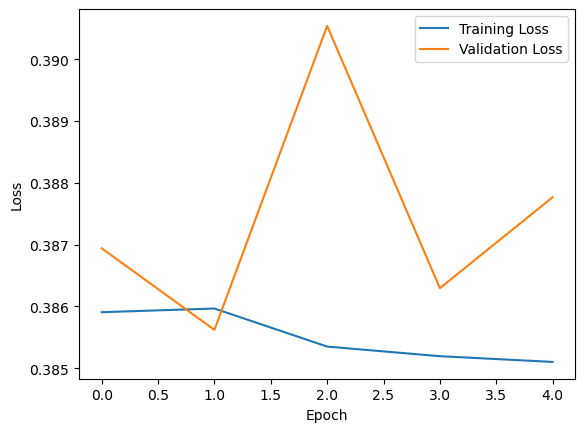

In [65]:
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_test, y_test in test_loader:
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        total += y_test.size(0)
        correct += (predicted == y_test).sum().item()

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 91.78%
